# Example of various pivpy methods

In [1]:
from pivpy import io, pivpy, graphics
import numpy as np
import xarray as xr
import importlib.resources
import pathlib

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f1 = 'Run000001.T000.D000.P000.H001.L.vec'
f2 = 'Run000002.T000.D000.P000.H001.L.vec'

# Ensure compatibility with different Python versions (3.9+ has 'files', 3.7 and 3.8 need 'path')
try:
    from importlib.resources import files
except ImportError:
    from importlib.resources import path as resource_path

# For Python 3.9+
try:
    path = files('pivpy') / 'data'
except NameError:
    # For Python 3.7 and 3.8
    with resource_path('pivpy', 'data') as data_path:
        path = data_path

# Convert to pathlib.Path if not already
path = pathlib.Path(path)


a = io.load_vec(path / "Insight" / f1 )
b = io.load_vec(path / "Insight" / f2 )

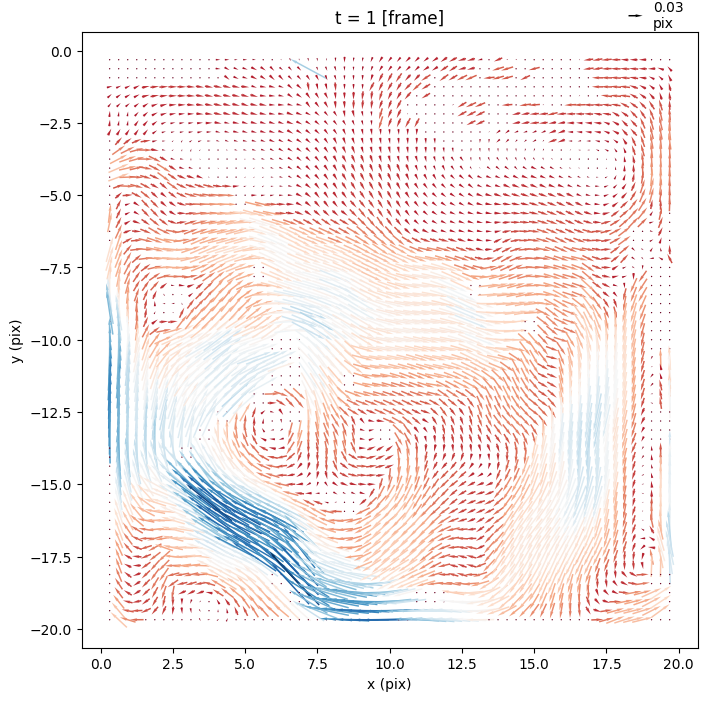

In [3]:
# select where t = 1 (explicit time)
fig, ax = graphics.quiver(a.sel(t=1),arrScale=10)

#increase figure size
fig.set_size_inches(11,8)

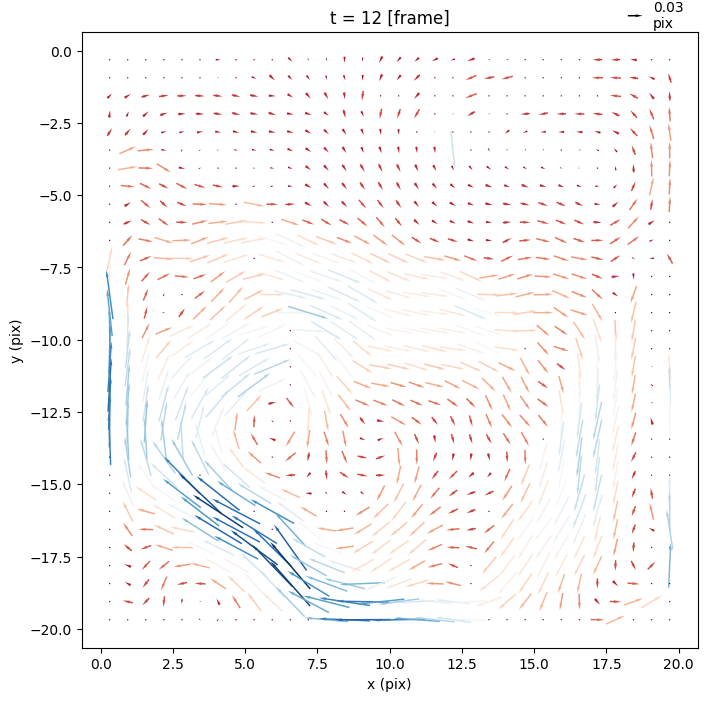

In [4]:
# select just the first frame whatever t is .
b['t'] = b['t'] + 10
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(b.isel(t=0),arrScale=10,nthArr=2)

In [5]:
c = a.piv.crop([5, 15,-5,-15])
a.u.shape, c.u.shape

((63, 63, 1), (32, 32, 1))

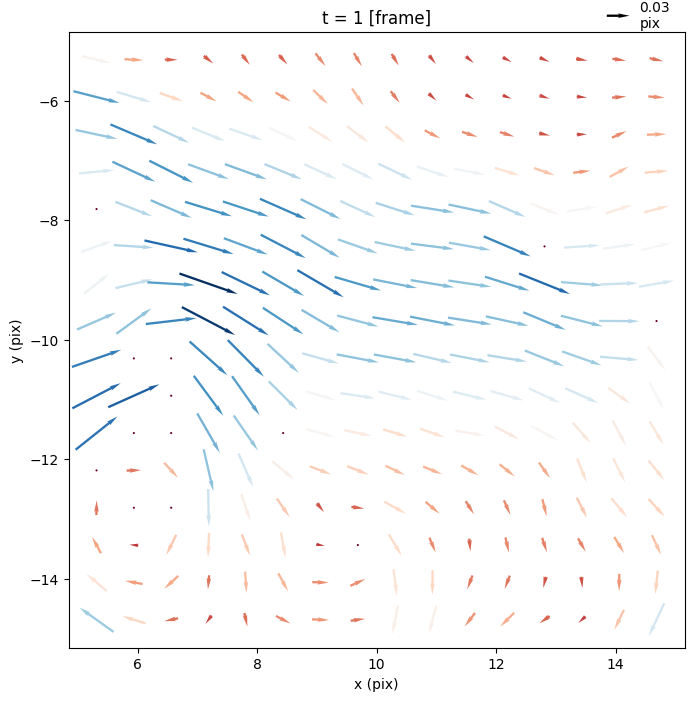

In [6]:
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(c.isel(t=0),arrScale=10,nthArr=2)

In [7]:
# let's play with some synthetic data 
c = io.create_sample_Dataset()

In [8]:
# want to slice it and not crop? 
d = c.sel(x = slice(35,70),y=slice(30,90))
print(d)

<xarray.Dataset> Size: 304B
Dimensions:  (y: 2, x: 1, t: 5)
Coordinates:
  * x        (x) int64 8B 48
  * y        (y) int64 16B 32 40
  * t        (t) int64 40B 0 1 2 3 4
Data variables:
    u        (y, x, t) float64 80B 11.0 11.0 11.0 11.0 ... 11.0 11.0 11.0 11.0
    v        (y, x, t) float64 80B 0.5 0.5 0.5 0.5 0.5 1.0 1.0 1.0 1.0 1.0
    chc      (y, x, t) float64 80B 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
Attributes: (2)


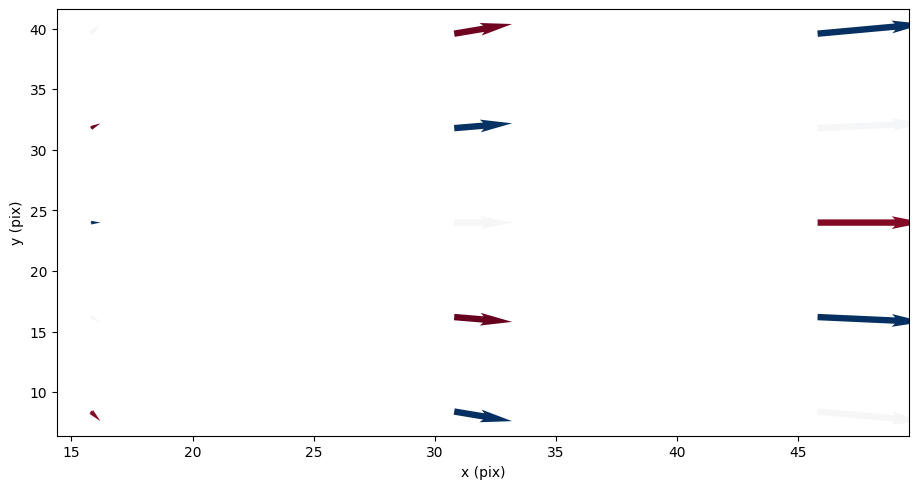

In [9]:
# want to show an ensemble average of 10 frames?
data = io.create_sample_Dataset(10)

# want to change the size of arrows and figure aspectratio?
fig,_=graphics.quiver(data.piv.average,arrScale=8,aspectratio=0.5)
fig.set_size_inches(11,8)

In [10]:
data = io.create_sample_field()
data.piv.strain()

<xarray.Dataset> Size: 1kB
Dimensions:  (x: 8, y: 5, t: 1)
Coordinates:
  * x        (x) int64 64B 16 32 48 64 80 96 112 128
  * y        (y) int64 40B 8 16 24 32 40
  * t        (t) int64 8B 0
Data variables:
    u        (y, x, t) float64 320B -0.4698 2.657 4.292 ... 7.546 10.66 10.63
    v        (y, x, t) float64 320B -2.91 -2.91 -2.91 ... 0.3797 0.3797 0.3797
    chc      (y, x, t) float64 320B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    w        (y, x, t) float64 320B 0.1241 0.108 0.0927 ... 0.01193 0.002657
Attributes: (2)

In [11]:
data.piv.vorticity()
data

<xarray.Dataset> Size: 1kB
Dimensions:  (x: 8, y: 5, t: 1)
Coordinates:
  * x        (x) int64 64B 16 32 48 64 80 96 112 128
  * y        (y) int64 40B 8 16 24 32 40
  * t        (t) int64 8B 0
Data variables:
    u        (y, x, t) float64 320B -0.4698 2.657 4.292 ... 7.546 10.66 10.63
    v        (y, x, t) float64 320B -2.91 -2.91 -2.91 ... 0.3797 0.3797 0.3797
    chc      (y, x, t) float64 320B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    w        (y, x, t) float64 320B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (2)